In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
data = pd.read_csv('Churn_Modelling.csv')

columns_to_drop = ['RowNumber', 'Surname', 'CustomerId', 'EstimatedSalary']
data.drop(columns=columns_to_drop, inplace=True)

data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'])   #Converting categorical variables into a numerical format


X = data_encoded.drop('Exited', axis=1)  # These are our features on which we train our model
Y = data_encoded['Exited']  # This is our target on which we have to predict

data.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression() # Using logistic regression
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.42      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.61      0.52      0.50      2000
weighted avg       0.73      0.80      0.74      2000



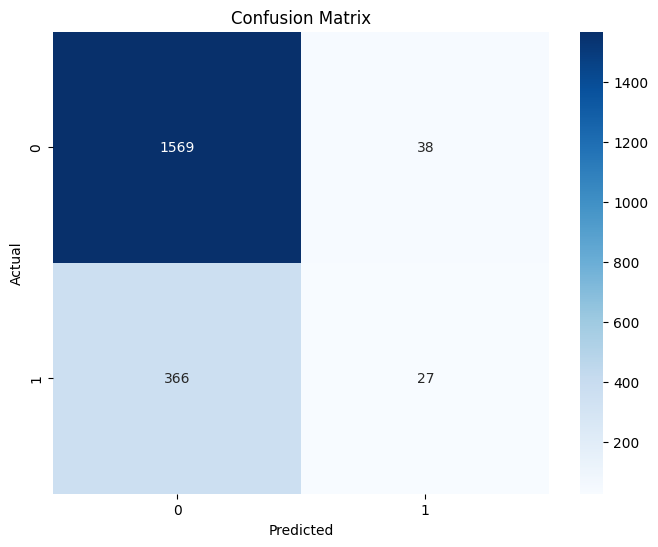

In [6]:
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()